# Linear Algebra

## By the end of this notebook you will be able to:

1. Add, multiply, and transpose vectors
2. Describe how matrix multiplication transforms vectors
3. Compute Pearson's Correlation Coefficient and fit Linear Regression models on *real data* using linear algebra and functions in existing python libraries

We'll get started by importing the main packages that we've worked with so far. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Run this code block below to define some plotting functions that we'll use to generate some of our plots. Once you run it, you can hide it by clicking **View > Collapse Selected Code** in the menu at the top of your notebook.

In [33]:
#Some functions I'm defining to generate some plots

def vector_addition_plots(a,b):
    if a.shape != b.shape:
        raise ValueError(f"Shape mismatch: {a.shape} vs {b.shape}")

    if a.shape[0] == 1:
        a = a.T
        b = b.T
    #set c = a + b
    c = a + b
    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    lim = (np.max(a) + np.max(b)) * 1.25
    
    ax[0].quiver(0,0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='black')
    ax[0].quiver(0,0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue')
    ax[0].quiver(0,0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='red')
    ax[0].set_xlim(-lim,lim)
    ax[0].set_ylim(-lim,lim)
    
    ax[0].legend([f'a: [{a[0]},{a[1]}]', 
                  f'b: [{b[0]},{b[1]}]', 
                  f'c: [{c[0]},{c[1]}]'])
    
    ax[0].grid()
    ax[0].set_title("All Vectors at Origin")
    
    ax[1].quiver(0,0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='black')
    ax[1].quiver(a[0],a[1], b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue')
    ax[1].quiver(0,0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='red')
    ax[1].set_xlim(-lim,lim)
    ax[1].set_ylim(-lim,lim)
    
    ax[1].legend([f'a: [{a[0]},{a[1]}]', 
                  f'b: [{b[0]},{b[1]}]', 
                  f'c: [{c[0]},{c[1]}]'])
    
    ax[1].grid()
    ax[1].set_title("Vector $b$ moved to tip of Vector $a$")
    fig.suptitle("Vector Addition")
    fig.tight_layout()
    plt.show()
    

def rotation_matrix_plots(vector):
    theta_1 = 0
    theta_2 = np.pi / 2
    theta_3 = np.pi
    theta_4 = 3 * np.pi / 2
    thetas = [theta_1, theta_2, theta_3, theta_4]

    max_val = np.max(np.abs(vector)) * 2
    
    fig, ax = plt.subplots(2,2, figsize=(10,8))
    
    for idx, theta in enumerate(thetas):
    
        row = idx // 2
        col = idx % 2
        current_ax = ax[row, col]
        
        A = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
        transformed_vector = A @ vector
        current_ax.quiver(0,0, vector[0], vector[1],angles='xy', scale_units='xy', scale=1,
                          facecolor='none', linewidth=1, linestyle='--')
        current_ax.quiver(0,0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1,
                          color='red')
        legend = current_ax.legend(['Original Vector', 'Transformed Vector'])
        handle = legend.legend_handles[0]
        handle.set_edgecolor('black')
        current_ax.set_xlim(-max_val,max_val)
        current_ax.set_ylim(-max_val,max_val)
        
        current_ax.set_title(f"Rotation: {theta / np.pi} $\pi$ radians")
        current_ax.grid()
        #plt.show()
        #print(f"Computed A matrix for {theta / np.pi} pi radian rotation is: \n {np.round(A, decimals=5)}")
    fig.suptitle("The effect of Multiplying a Vector with a Rotation Matrix")
    fig.tight_layout()
    plt.show()

def plot_scalar_multiplication(c,g,k):
    if c.shape[0] == 1:
        c = c.T
        g = g.T
        
    if np.abs(k) <= 1:
        zorders = [0,1]
        lim = 1.25*np.max(np.abs(c))
    else:
        zorders = [1,0]
        lim = 1.25*np.max(np.abs(g))
    plt.quiver(0,0, c[0],c[1],
               angles='xy', scale_units='xy', scale=1, label='c', color='red',zorder=zorders[0])
    plt.quiver(0,0, g[0],g[1],
               angles='xy', scale_units='xy', scale=1, label=f'{k}*c', color='blue',zorder=zorders[1])
    
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.legend()
    plt.title(f"Scalar Multiplication of $c$ by {k}")
    plt.grid()
    plt.show()

## Vectors and Vector Operations

We can build **vectors**, a one-dimensional array of numbers, using NumPy. Let's start with trying to add two vectors. In the code block below, define two vectors **a** and **b**. 

In [3]:
a = np.array([[1],
              [-1]])

b = np.array([[1],
              [1]])

Let's check the dimensions of our vectors. We can find these by using the <code>shape</code> attributes of <code>a</code> and <code>b</code>.

In [4]:
print(a.shape, b.shape)

(2, 1) (2, 1)


Based on the output above, our vectors should have **2** rows and **1** column. Since the elements in our vectors are in a single column, we call <code>a</code> and <code>b</code> **column vectors**. More precisely, they are 2D column vectors. We can check this by using the <code>ndim</code> attribute. 

In [5]:
print(f"a is a {a.ndim} column vector")
print(f"b is a {b.ndim} column vector")

a is a 2 column vector
b is a 2 column vector


Note that if we wanted, we could have defined our vectors to have **1** row and **2** columns. Then they would be called **row vectors** To defined a row vector using a NumPy array we'll create an array from a list of its elements as demonstrated in the cell below:

In [6]:
d = np.array([ [1,0] ])
e = np.array([ [0,-1] ])

print(d.shape, e.shape)

(1, 2) (1, 2)


Now, let's see what happens when we add together our original vectors **a** and **b**.

Using vector addition, create a new vector **c** and print the result. How would you describe what's happening when you perform this operation?

In [7]:
c = a + b

if c.shape[1] == 1:
    print(f"Vector c: \n {c} \n has shape {c.shape} \n c is a {c.ndim}D column vector")
elif c.shape[0]>1 and c.shape[1] >1:
    print(f"You tried adding a column vector to a row vector! \n {c} \n has shape{c.shape} \n it is not a vector!")
else:
    print(f"Vector c: \n {c} \n has shape {c.shape} \n c is a {c.ndim}D row vector")

Vector c: 
 [[2]
 [0]] 
 has shape (2, 1) 
 c is a 2D column vector


There's actually a pretty nice geometric interpretation of what happens when you add two vectors. Usually, when we plot vectors, we have them all start with their tails at the origing (0,0).

However, we can visualize what's happening in vector addition by moving the tail **b** to the tip of **a**. After performing this shift, the tip of **b** will be exactly where the tip of **c** is when **c** starts from the origin.

<div class="alert alert-success">
    <b>Task:</b>Try defining new <code>a</code> and <code>b</code> vectors, and use the plotting function below to visualize the results: <br>
<i>What do you notice?</i>
</div>

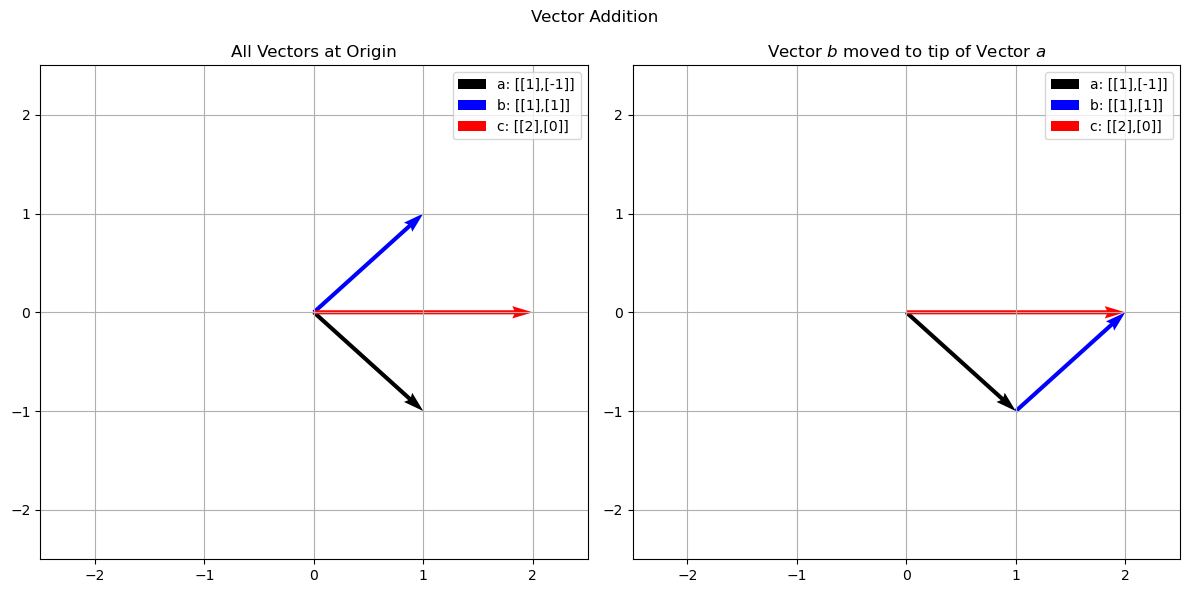

In [8]:
#Create a vectors to add together
a = ...
b = ...
vector_addition_plots(a,b)

It turns out that when we add vectors, it's as simple as adding together elements with the same row index. 

However, multiplying vectors is a more complex operation because it turns out that there are several ways you could define multiplication for an array of numbers like a vector.

For example, you might try multiplying a vector by a single number. This type of multiplication changes the length or *scale* of the vector. Because of this, we call this type of multiplication **scalar multiplication**, and we call the number in the multiplication a **scalar**.

<div class="alert alert-success">
    <b>Task:</b>Define a numerical (i.e. float or int) variable, and assign it to <code>k</code>. Then, multiply your vector <code>c</code> by k and assign the result to a new variable <code>g</code> <br><br>
<b>How does <code>c</code> compare to <code>g</code>?</b>
</div>

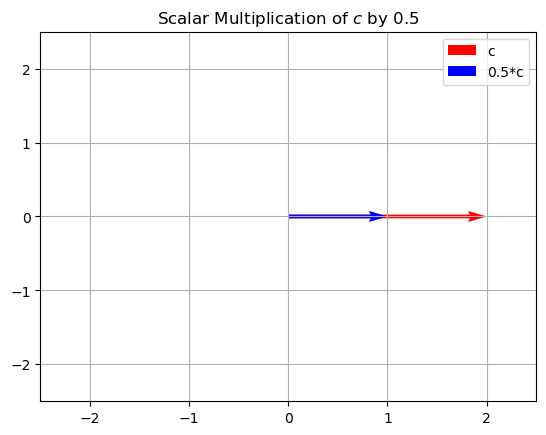

In [37]:
k = ...
g = ...

plot_scalar_multiplication(c,g,k)

Sometimes we have a vector that we want to scale to have a length of 1. To do this we'll have to calculate the length of our vector $L$ and then multiply our vector by the reciprocal value $\frac{1}{L}$. For a 2D vector $v = \begin{bmatrix} a \\ b \end{bmatrix}$:
$$L = \sqrt{a^2 + b^2}$$
NumPy actually has a built-in function that performs this calculation: <code>np.linalg.norm()</code>

Computing the scalar multiplication $\frac{1}{L}v$ is called **normalization** and the result is a **normalized vector** with length 1. 

In [54]:
v = np.array([[3],
             [4]])

L = np.sqrt(v[0]**2 + v[1]**2)
print(f"v has length {L[0]}")

L_numpy = np.linalg.norm(v)
print(f"Length of v computed by NumPy Library: {L_numpy}")

v_norm = 1 / L_numpy * v
print(f"After normalization v= \n {v_norm}")

v has length 5.0
Length of v computed by Numpy Library: 5.0
After normalization v= 
 [[0.6]
 [0.8]]


Moving past scalar multiplication, you might try multiplying each element with the same row index. This is what happens when you multiply two vectors together in python using the <code>*</code> operator. Give it a try in the code below:

In [52]:
element_wise = ...
print(f"Result of element-wise multiplication is: \n {element_wise} \n with shape {element_wise.shape} \n")

Result of element-wise multiplication is: 
 [[ 1]
 [-1]] 
 with shape (2, 1) 



While python allows you to do element-wise multiplication (i.e. multiplying elements with the same row index), this operation is not valid in linear algebra. **To perform vector multiplication, we have to consider the dimensions of our vectors!**

Specifically, we can only multiply two vectors if the column-dimension (axis=1) of our first vector is the same as the row-dimension (axis=0) of our second vector.

Recall that our vectors <code>a</code> and <code>b</code> both have shape (2,1). If we try to multiply <code>a</code> and <code>b</code> as they are now, the dimensions in our operation will be (2,1) x (2,1). Since the inner dimensions don't match (1 != 2), we can't multiply our vectors together. However, if we could convert <code>b</code> to a row vector with shape (1,2), then we could perform vector multiplication with our variables.

To do this, we can *transpose* <code>b</code> to swap its row and column dimensions. There are two ways to do this:

1. Using the NumPy array attribute <code>.T</code>:
2. Calling the array method <code>.transpose()</code> which gives you more control over the output


<div class="alert alert-success">
    <b>Task:</b>In the codeblock below, transpose <code>b</code> and assign it to the variable <code>transposed_vec</code> and print the result along with its shape
</div>

In [57]:
transposed_vec = ...
print(transposed_vec, transposed_vec.shape)

[[1 1]] (1, 2)


Now that we know how to transpose vectors, we can perform vector multiplication. To do that in python, we use the operator <code>@</code>.

When we tranpose <code>b</code>, this gives our multiplication the dimensions (2,1) x (1,2). Because the bigger dimensions are on the outside, this operation is called an **outer product**.

Alternatively, we could have transposed <code>a</code> instead, and our multiplication would have dimensions (1,2) x (2,1). This time the bigger dimensions are on the inside, so we'll call this the **inner product**.

Calculate the inner and outer products between <code>a</code> and <code>b</code> and assign them to the variables <code>inner</code> and <code>outer</code> in the cell below:

In [58]:
inner = ...
outer = ...

print(f"Result of inner product multiplication is: \n {inner} \n with shape {inner.shape} \n ")
print(f"Result of outer product multiplication is: \n {outer} \n with shape {outer.shape} \n")

Result of inner product multiplication is: 
 [[0]] 
 with shape (1, 1) 
 
Result of outer product multiplication is: 
 [[ 1  1]
 [-1 -1]] 
 with shape (2, 2) 



Calculating the inner product gave us an object with shape (1,1), but that's just a scalar! We could represent this with a float or int instead of with a NumPy array.

On the otherhand, when we look at the result from calculating the outer product, the object has shape (2,2). Notice that both the row and column dimensions of this object are greater than 1. When this condition is met, we call the object a matrix.

## Matrices and Linear Transformations

Matrices play a special role in linear algebra because of their ability to *transform* vectors through matrix-vector multiplication. Because this operation changes the coordinates of our vector, it is also called a **linear transformation**.

One special matrix is the rotation matrix:
$$\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}$$

When we multiply a vector with the rotation matrix, our vector rotates counter-clockwise by the angle $\theta$.

Run the code below to visualize the effect of this linear transformation using different values for $\theta$. 

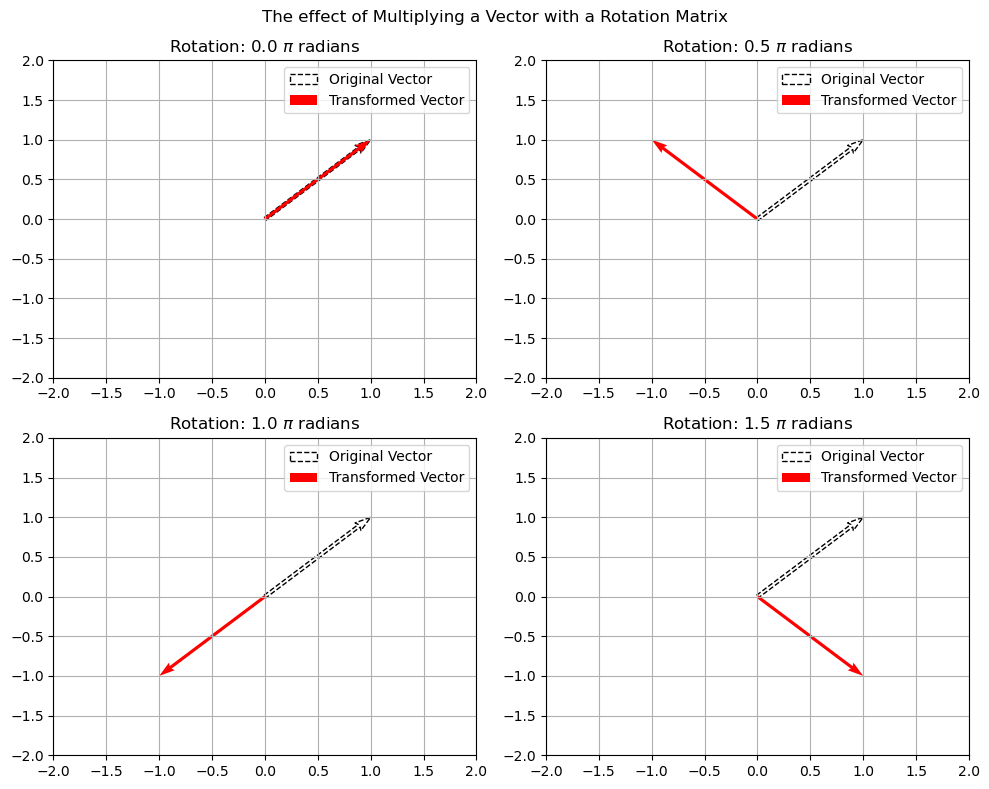

In [59]:
vector = np.array([[1],
                   [1]])

rotation_matrix_plots(vector)

## Data Analysis using Linear Algebra

Now that we've covered some linear algebra basics, we can apply them to data!

Run the cell below to load in the file <code>species_brainmass_neurons.csv</code> that we used in the in-class Pandas activity.

In [60]:
#Load in the data
brains_df = pd.read_csv('Data/species_brainmass_neurons.csv', sep=',')
brains_df.head()

,Species,Order,cortex_mass_g,Neurons,Other_cells,Neurons_mg,Other_cells_mg,Source
0,Sorex fumeus,Eulipotyphla,0.084,9730000,9290000,116727,111754,"Sarko et al., 2009"
1,Mus musculus,Glires,0.173,13688162,12061838,78672,68643,"Herculano-Houzel et al., 2006"
2,Blarina brevicauda,Eulipotyphla,0.197,11876000,15820000,60214,80729,"Sarko et al., 2009"
3,Heterocephalus glaber,Glires,0.184,6151875,8398125,33374,45894,"Herculano-Houzel et al., 2011"
4,Condylura cristata,Eulipotyphla,0.420,17250000,32010000,40777,76995,"Sarko et al., 2009"


Before we do our analysis, we'll need to extract our datasets from <code>brains_df</code> and convert them to NumPy arrays. We can do this using the dataframe method <code>.to_numpy()</code>.

<div class="alert alert-success">
    <b>Task: </b>Define variables <code>primate_mass</code>, <code>primate_neurons</code>, <code>nonprimate_mass</code>, <code>nonprimate_neurons</code> by taking steps below:
    
1. Use the column names in the dataframe above to access data in primate_df and <code>nonprimate_df</code>

2. Variables <code>primate_mass</code> and <code>nonprimate_mass</code> should contain data about the mass of the cortex

3. Variables <code>primate_neurons</code> and <code>nonprimate_neurons</code> should contain data about the number of neurons

4. Use the <code>.to_numpy()</code> method to convert your dataframe variables into numpy arrays
</div>

In [61]:
#Partition Datasets and convert to numpy array
primate_df = brains_df[brains_df['Order']=='Primata']
nonprimate_df = brains_df[brains_df['Order']!='Primata']

primate_mass = ...
primate_neurons = ...

nonprimate_mass = ...
nonprimate_neurons = ...


print(f"primate_mass is a {primate_mass.ndim}-D vector")
print(f"primate_neurons is a {primate_neurons.ndim}-D vector")

print(f"nonprimate_mass is a {nonprimate_mass.ndim}-D vector")
print(f"nonprimate_neurons is a {nonprimate_neurons.ndim}-D vector")


primate_mass is a 11-D vector
primate_neurons is a 11-D vector
nonprimate_mass is a 27-D vector
nonprimate_neurons is a 27-D vector


**Let's plot our results below using** <code>plt.scatter()</code>

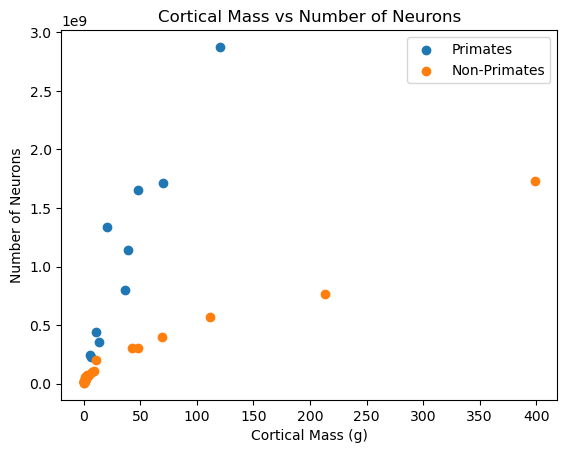

In [62]:
#Plot the datasets to visualize the trends
plt.scatter(primate_mass, primate_neurons)
plt.scatter(nonprimate_mass, nonprimate_neurons)
plt.xlabel("Cortical Mass (g)")
plt.ylabel("Number of Neurons")
plt.title("Cortical Mass vs Number of Neurons")
plt.legend(['Primates','Non-Primates'])
plt.show()

If we look closely at each our datasets in the scatterplot above, it looks like all of the points are in a straight line. In other words, it looks like there may be a **linear relationship** between *Cortical Mass* and *Number of Neurons* for both primates and non-primates. If this is true, we can develop a **linear model** of our data.

We can actually quantify how well a linear model would describe our data by computing the **Pearsons correlation coefficient** using the procedure below:

1. Define your independent variable as $x$ and your dependent variable as $y$
2. Create "mean-centered" versions of your data by computing $x - x_{mean}$ and $y-y_{mean}$
3. Calculate the vector product between $x_{centered}$ and $y_{centered}$. You will divide this value by the result of the next step.
4. Compute the **norm** of each mean-centered vector using <code>np.linalg.norm()</code> and multiply these numbers together.
5. Divide the result from **step 3** by the result from **step 4**

If the resulting number is close to 1 or -1, then the data is well-described by a linear relationship. On the otherhand, if the result is close to 0, then the data is not well described by a linear relationship.

<div class="alert alert-success">
    <b>Task:</b> Complete the function below, then use it to compute the Pearson's correlation coefficient for both the primate and non-primate datasets.<br>
</div>

In [63]:
#Define function to compute correlation:
def compute_pearsons(x,y):
    #Step 1: Mean-center your data
    x_centered = ...
    y_centered = ...

    numerator = ...
    denominator = ...

    r = numerator / denominator
    return r


In [64]:
primate_r = compute_pearsons(primate_mass, primate_neurons)
nonprimate_r = compute_pearsons(nonprimate_mass, nonprimate_neurons)

print(f"Primate R: {primate_r}, Non-Primate R: {nonprimate_r}")

Primate R: 0.9510144650738589, Non-Primate R: 0.9891539213320388


Computing the Pearson's correlation coefficient is super useful, so several python libraries contain functions that calculate it for you. This means that you can spend less time fixing formulas and more time analyzing your data!

Let's try using the <code>pearsonr()</code> function from the <code>scipy.stats</code> library.

In [65]:
from scipy.stats import pearsonr

primate_r_scipy, _ = pearsonr(primate_mass, primate_neurons)
nonprimate_r_scipy, _ = pearsonr(nonprimate_mass, nonprimate_neurons)

print("Primate R (scipy):", primate_r_scipy)
print("Non-Primate R (scipy):", nonprimate_r_scipy)


Primate r (scipy): 0.9510144650738591
Non-Primate r (scipy): 0.9891539213320388


As you can see, you get nearly identical results with much less code!

Now that we've confirmed a linear model describes the relationship between *Cortical Mass* and *Number of Neurons*, we can use **linear regression** to find the line of best fit for our data.

We'll use *Cortical Mass* as the independent variable in our model and *Number of Neurons* as our dependent variable. This means that if we have a value for *Cortical Mass* our model will predict the value for *Number of Neurons*

To fit our model, we'll solve the equation: $ y = X\beta$ for the vector $\beta$. The closed-form solution to this equation is:
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

Our line of best fit $\hat{y}$ is the computed as:
$$\hat{y} = X\hat{\beta}$$

<div class="alert alert-success">
    <b>Task:</b> Complete the function below by completing the definitions for <code>beta_hat</code> and <code>y_hat</code> using the matrix multiplication operator <code>@</code>. 
    
To calculate $(X^TX)^{-1}$, use the function <code>np.linalg.inv()</code>. 
Then use this function to fit and plot linear models for both primate and non-primate datasets by running the code below. <br>
</div>

In [66]:
#Define function to perform linear regression
def linear_regression_model(x,y):
    intercept = np.ones(len(x))
    X = np.column_stack([intercept, x])

    #Closed form least-squares solution
    beta_hat = ...

    #Implement linear model
    y_hat = ...
    return y_hat, beta_hat

    

In [67]:
primate_y, primate_beta = linear_regression_model(primate_mass, primate_neurons)
nonprimate_y, nonprimate_beta = linear_regression_model(nonprimate_mass, nonprimate_neurons)

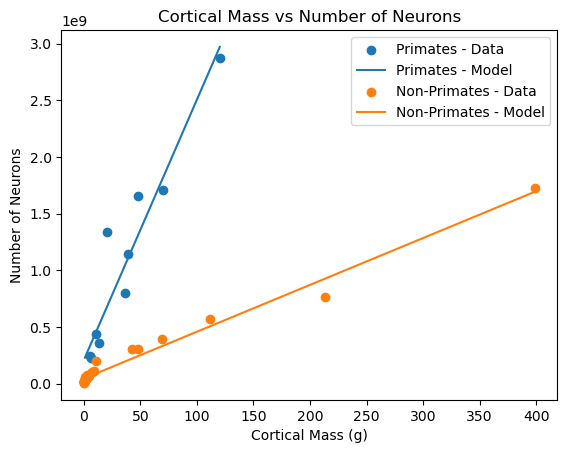

In [68]:
plt.scatter(primate_mass, primate_neurons)
plt.plot(primate_mass, primate_y)

plt.scatter(nonprimate_mass, nonprimate_neurons)
plt.plot(nonprimate_mass, nonprimate_y)

plt.xlabel("Cortical Mass (g)")
plt.ylabel("Number of Neurons")
plt.title("Cortical Mass vs Number of Neurons")
plt.legend(['Primates - Data','Primates - Model',
            'Non-Primates - Data','Non-Primates - Model'])
plt.show()

As with the Pearson's correlation coefficient, existing python libraries have a predefined methods to perform linear regression. Let's try one out by importing the <code>LinearRegression</code> class from <code>sklearn.linear_model</code>.

We'll initialize a different <code>LinearRegression</code> object for each of our datasets. To use this class, we actually first need to make sure the column dimension of our independent variable vectors is 1. To do this we'll append the array method <code>.reshape(-1,1)</code> to <code>primate_mass</code> and <code>nonprimate_mass</code>

Once we've done that, we can fit each model using the <code>.fit()</code> method and compare the results to what we computed with our regression approach.

In [69]:
from sklearn.linear_model import LinearRegression

primate_model = LinearRegression()
primate_model.fit(primate_mass.reshape(-1, 1), primate_neurons)

nonprimate_model = LinearRegression()
nonprimate_model.fit(nonprimate_mass.reshape(-1, 1), nonprimate_neurons)

primate_beta_sk = [primate_model.intercept_, primate_model.coef_[0]]
nonprimate_beta_sk = [nonprimate_model.intercept_, nonprimate_model.coef_[0]]

In [70]:
#Compare the beta results
print(f"Computed b0 for Primates: {primate_beta[0]}, Model b0: {primate_beta_sk[0]}")
print(f"Computed b0 for Non-Primates: {nonprimate_beta[0]}, Model b0: {nonprimate_beta_sk[0]}")

Computed b0 for Primates: 208377119.02390063, Model b0: 208377119.0238999
Computed b0 for Non-Primates: 44582057.15817898, Model b0: 44582057.158179015


Once again, we see that the results between our model and the model from an existing library are nearly identical! If we want to visualize this, we can use the <code>predict()</code> method on each of our models and plot the results with the lines of best fit that we previously computed.

Run the code below to see how well the two modeling approaches align.

In [71]:
#Compute y_pred and re-plot
primate_pred = primate_model.predict(primate_mass.reshape(-1,1))
nonprimate_pred = nonprimate_model.predict(nonprimate_mass.reshape(-1,1))

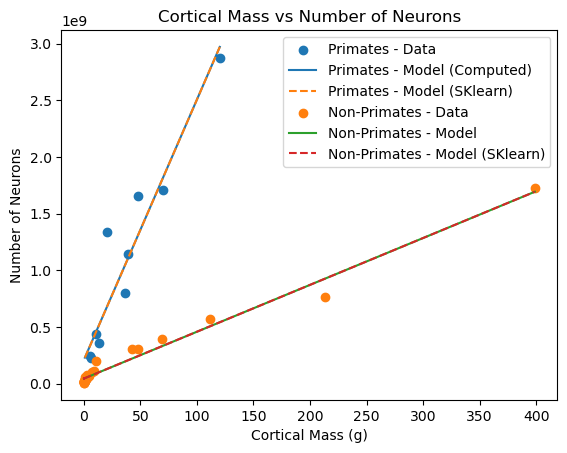

In [72]:
plt.scatter(primate_mass, primate_neurons)
plt.plot(primate_mass, primate_y)


plt.scatter(nonprimate_mass, nonprimate_neurons)
plt.plot(nonprimate_mass, nonprimate_y)

plt.plot(primate_mass, primate_pred, '--', c='y')
plt.plot(nonprimate_mass, nonprimate_pred, '--')


plt.xlabel("Cortical Mass (g)")
plt.ylabel("Number of Neurons")
plt.title("Cortical Mass vs Number of Neurons")
plt.legend(['Primates - Data','Primates - Model (Computed)', 'Primates - Model (SKlearn)',
            'Non-Primates - Data','Non-Primates - Model','Non-Primates - Model (SKlearn)'])
plt.show()